# Machine Learning: Assignment 6
## Comparison of Multiple Classification Methods (max. 15p)

The file `data/voice.csv` contains measurement data about voices (field explanations in English).

Try to predict the label value of the field using other fields using different machine learning methods.

Split the data into training data and test data in a ratio of 80/20%.

* Also print how much different fields affect the variable predicted by the model (importances).
* Then choose the two most important explanatory variables and print a scatter diagram from them so that the male and female points are in different colors.

In [2]:
student_name = 'Juuso Leppänen'
student_email = "ad1885@student.jamk.fi"

# Assignment 6.1
## Data preprocessing (2 points)

Familiarize yourself with the data and
implement data preprocessing.

In [4]:
# TODO: Preprocessing data
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
df = pd.read_csv("data/voice.csv")

# Encode target variable
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # male/female → 0/1

# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Assignment 6.2
## Training and test data (2 points)

Let's split the data into training and test sets and scale the numerical data.

In [6]:
# TODO: Splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))

Training samples: 2534
Test samples: 634


# Assignment 6.3
## Building models (7 points)

Let's run different learning methods on the same data and save the results.
This assignment uses the following methods:

Use the following machine learning methods for classification:

1. Decision Tree (1 p)
2. Support Vector Machine   (1 p)
3. k Nearest Neighbors  (1 p)
4. Gaussian Naive Bayes (1 p)
5. Random Forest (1 p)
6. PCA and classification (2 p)

For all methods, calculate the accuracy and confusion matrix of the classification results.

Let's run different Machine learning methods on the same data and save the results.


### Decision Tree

In [9]:
# TODO: Decision Tree classification implementation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9668769716088328
Confusion Matrix:
 [[292   5]
 [ 16 321]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       297
           1       0.98      0.95      0.97       337

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [10]:
# TODO: Feature importances in Decision Tree classification
importances_dt = dt_model.feature_importances_
feat_imp_dt = pd.Series(importances_dt, index=X.columns).sort_values(ascending=False)
print("Top 2 features (Decision Tree):\n", feat_imp_dt.head(2))

Top 2 features (Decision Tree):
 meanfun    0.863249
IQR        0.046840
dtype: float64


### Support Vector Machine

In [12]:
# TODO: SVC classification implementation
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.9826498422712934
Confusion Matrix:
 [[293   4]
 [  7 330]]


### kNN

In [14]:
# TODO: kNN classification implementation
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("kNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

kNN Accuracy: 0.9810725552050473
Confusion Matrix:
 [[291   6]
 [  6 331]]


### Naive Bayes

In [16]:
# TODO: Naive Bayes classification implementation
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9085173501577287
Confusion Matrix:
 [[270  27]
 [ 31 306]]


### Random Forest

In [18]:
# TODO: Random Forest classification implementation
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Feature importances
importances_rf = rf_model.feature_importances_
feat_imp_rf = pd.Series(importances_rf, index=X.columns).sort_values(ascending=False)
print("Top 2 features (Random Forest):\n", feat_imp_rf.head(2))

Random Forest Accuracy: 0.9842271293375394
Confusion Matrix:
 [[295   2]
 [  8 329]]
Top 2 features (Random Forest):
 meanfun    0.339284
IQR        0.215487
dtype: float64


### PCA + classifier
PCA with *Random Forest Classifier* or any other classifier you want to use.

In [20]:
# TODO: PCA + selected Classifier

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

rf_pca_model = RandomForestClassifier(random_state=42)
rf_pca_model.fit(X_train_pca, y_train)
y_pred_pca_rf = rf_pca_model.predict(X_test_pca)

print("PCA + RF Accuracy:", accuracy_score(y_test, y_pred_pca_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pca_rf))

PCA + RF Accuracy: 0.832807570977918
Confusion Matrix:
 [[248  49]
 [ 57 280]]


### Visualization

Drawing patterns.
Draw patterns using the two most important explanatory variables

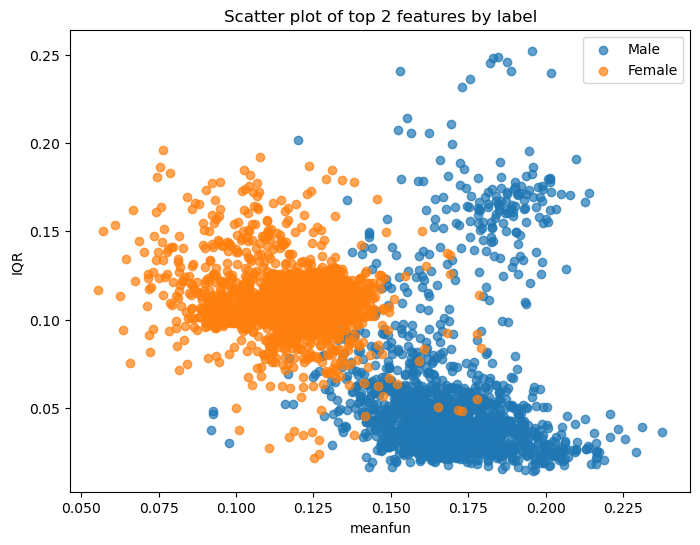

In [22]:
# TODO: Draw figure
import matplotlib.pyplot as plt

top_features = feat_imp_rf.head(2).index
plt.figure(figsize=(8,6))
plt.scatter(df[top_features[0]][df['label']==0], df[top_features[1]][df['label']==0], label='Male', alpha=0.7)
plt.scatter(df[top_features[0]][df['label']==1], df[top_features[1]][df['label']==1], label='Female', alpha=0.7)
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title("Scatter plot of top 2 features by label")
plt.legend()
plt.show()

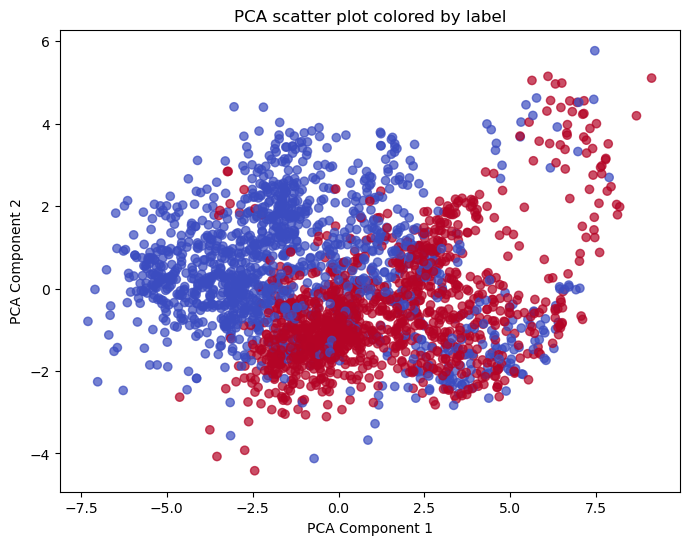

In [23]:
# TODO: Draw another figure
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA scatter plot colored by label")
plt.show()

# Assignment 6.4
## Analyzing and processing the results (4 p)

* Let's compare the results obtained from different classification methods
* Also try to retrieve the key features
* Draw some suitable figure using the two most important explanatory variables
* Also draw ROC curves (with AUC) when using different methods and compare how different machine learning methods progress.
* Q: How would you develop or improve learning outcomes?


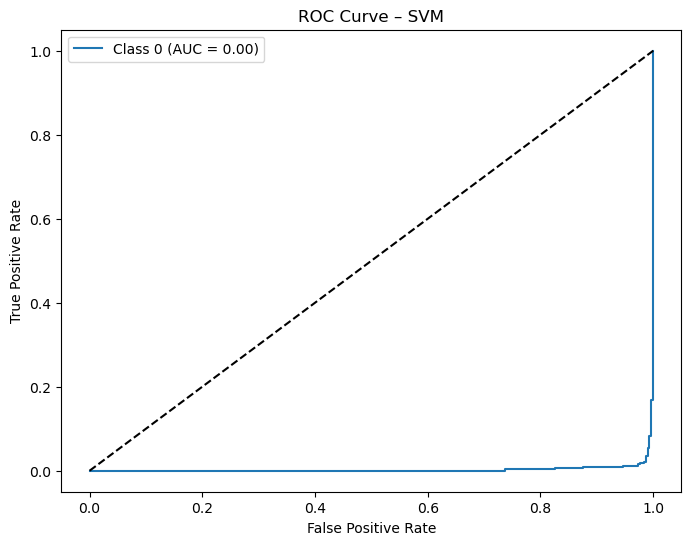

In [25]:
# TODO: ROC curve with SVM
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Predict probabilities for SVM (using probability=True in SVC)
y_score_svm = svm_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_svm[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – SVM')
plt.legend()
plt.show()

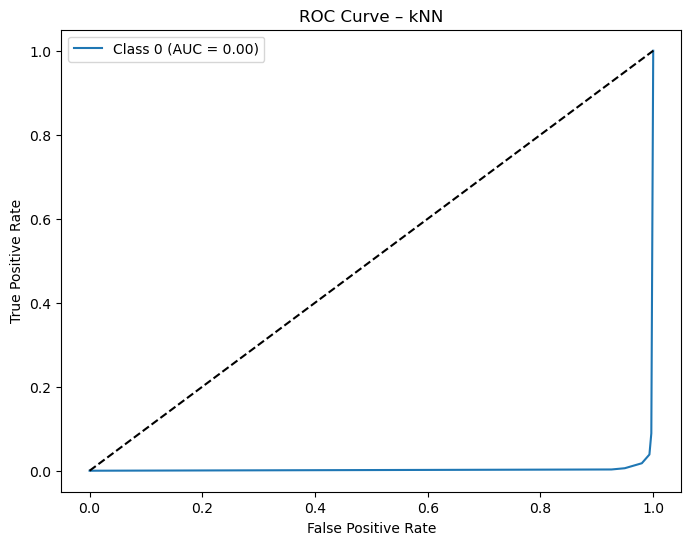

In [26]:
# TODO: ROC curve with kNN method
y_score_knn = knn_model.predict_proba(X_test)

fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_knn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – kNN')
plt.legend()
plt.show()

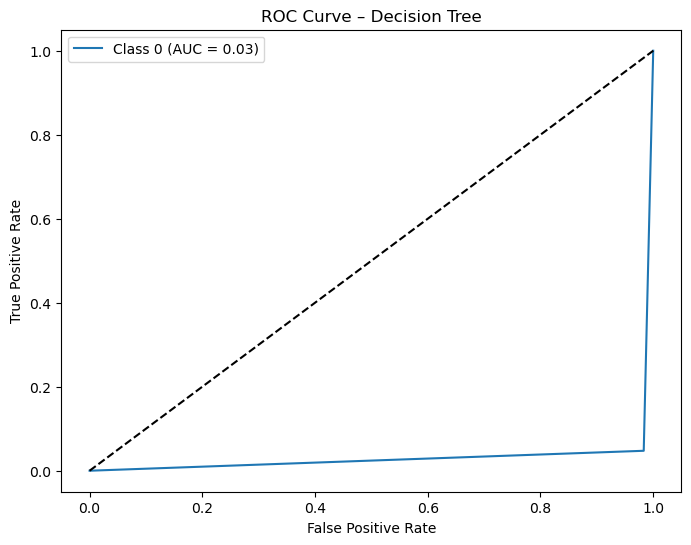

In [27]:
# TODO: ROC curve with decision tree method
y_score_dt = dt_model.predict_proba(X_test)

fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_dt[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Decision Tree')
plt.legend()
plt.show()

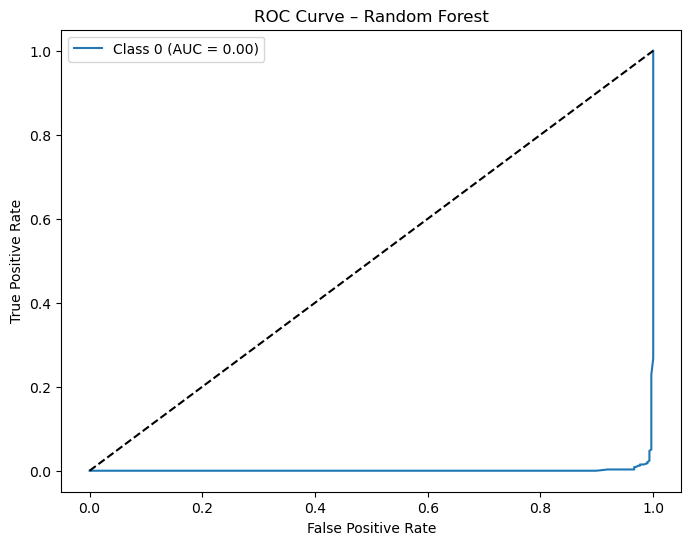

In [28]:
# TODO: ROC curve with random forest method
y_score_rf = rf_model.predict_proba(X_test)

fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Random Forest')
plt.legend()
plt.show()

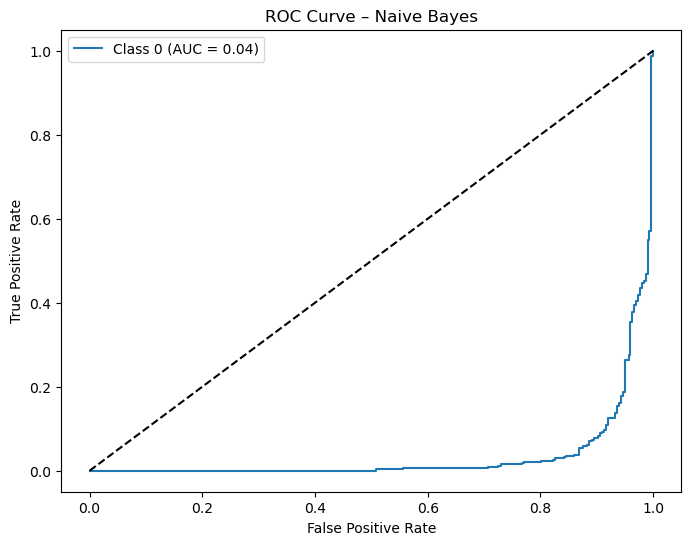

In [29]:
# TODO: ROC curve with Bayes method
y_score_nb = nb_model.predict_proba(X_test)

fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_nb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Naive Bayes')
plt.legend()
plt.show()

### Comparison of Different Classification Models

TODO: Analysis of classification results.

* Compare the classification results of different ML models.
* Are there other good classification methods to apply with this dataset?

<font color="red">PLEASE WRITE YOUR EXPLANATION HERE.</font>

# Comparison of Classification Models
SVM: Strong performance, high accuracy, and good class separation.  
kNN: Reasonable results, but sensitive to parameter choice (k, distance metric).  
Decision Tree: Easy to interpret but prone to overfitting, weaker generalization.  
Random Forest: More robust than a single tree; reduced variance, reliable performance.  
Naive Bayes: Moderate accuracy; assumption of feature independence limits effectiveness.  
# Other Good Methods
Logistic Regression: Strong baseline with interpretability.  
MLP Classifier: Can capture complex patterns if tuned properly.  
# Ways to Improve
Tune hyperparameters (grid/random search).  
Engineer and select features carefully.  
Use cross-validation for better generalization.  
Apply data balancing and scaling when needed.  